# Project Outline
1. Abstract
2. Objective
3. Problem Statement
4. Tools & Libraries
5. Data Description
6. Analysis
7. Key Insights
8. Recommendation

# Abstract

The New York City Metropolitan Transportation Authority (MTA) subway system experiences numerous operational disturbances. These incidents are pain points that impact subway operations, commuters’ daily safety, and service reliability. This analysis aims to find the root cause and factors that influence subway rider experiences and daily travel schedules.

# Objective

The goal of this project is to explore and uncover major challenges that disrupt services for New York City Subway riders. Millions of New Yorkers rely on the subway for daily commutes to work and other travel needs. Exploring the data will help to better understand some of the factors that influence delays and also look at patterns during different seasons of the year and weekends vs. weekdays, how that might contribute to some of the problems, and what MTA can do to improve service for NYC daily commuters.

# Problem Statement

This analysis used historical data from 2020 to November 2024 to gain insights and better understand the contributing factors behind incidents that affect service quality and rider safety in NYC

1. Identify the most frequent incident categories, divisions, and lines affected.
2. Uncover seasonal trends and patterns in incidents across time.
3. Understand the severity of incidents
4. Assess the relationship between day types (weekdays, weekends) and incident occurrences.

# Tools and Libraries

Google Colab

Tableau Desktop

Python program

Pandas, numpy, matplothlib and seaborn


# Understanding the Dataset

1. Data collected was collected from Data.gov
2. Jan 2000 to November 2024
3. Data type = CVS
4. Columns = 6 and Rows = 1966


# Data Description

Month: The month in which the Major Incidents are being calculated (yyyy-mm-dd).

Division The A Division (numbered subway lines) and B Division (lettered subway lines).

Line: Each subway line (1, 2, 3, 4, 5, 6, 7, A, C, E, B, D, F, M, G, J, Z, L, N, Q, R, W, S 42nd, S Rock, S Fkln).

day_type: Represents weekday as 1, weekend as 2.

Category:The six categories that fall under the definition of a Major Incident: Track, Signals, Persons on Trackbed/Police/Medical, Stations and Structure, Subway Car, and Other.

Count: The number of major incidents that occurred per month and per subway line.



# Importing data and required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and Review Dataframe

In [2]:
df = pd.read_csv('/content/MTA_Subway_Major_Incidents__Beginning_2020.csv')

df.head()


,month,division,line,day_type,category,count
0,2020-01-01,A DIVISION,1,1,Other,1
1,2020-01-01,A DIVISION,2,1,Persons on Trackbed/Police/Medical,1
2,2020-01-01,A DIVISION,2,2,Other,1
3,2020-01-01,A DIVISION,3,1,Persons on Trackbed/Police/Medical,1
4,2020-01-01,A DIVISION,3,1,Signals,2


# Exploring Data

In [3]:
# Check data shape

df.shape

(1966, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     1966 non-null   object
 1   division  1965 non-null   object
 2   line      1965 non-null   object
 3   day_type  1966 non-null   int64 
 4   category  1966 non-null   object
 5   count     1966 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 92.3+ KB


In [5]:
df.dtypes


,0
month,object
division,object
line,object
day_type,int64
category,object
count,int64


As shown in the above output that month is object which need to convert to datetime object

In [6]:
df.isnull().sum()

,0
month,0
division,1
line,1
day_type,0
category,0
count,0


There are only two 2 null values , 1 in divison column and 1 in line column. Which is not a major issue.  

In [7]:
df.duplicated().sum()

0

Good news there is no duplicates

In [8]:
df.describe()

,day_type,count
count,1966.000000,1966.000000
mean,1.136317,1.305697
std,0.343213,0.636976
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,2.000000,5.000000


Covert Month to datetime object

In [11]:
df['month']=  pd.to_datetime(df['month'])

Check to data type again

In [12]:
df.dtypes

,0
month,datetime64[ns]
division,object
line,object
day_type,int64
category,object
count,int64


Great, we can see that month was convert to datetime

In [28]:
cat = df.groupby('category')['count'].sum()
print(cat)

category
Other                                 215
Persons on Trackbed/Police/Medical    820
Signals                               709
Stations and Structure                187
Subway Car                            230
Track                                 406
Name: count, dtype: int64


In [30]:
div = df.groupby('division')['count'].sum()
print(div)

division
A DIVISION    1151
B DIVISION    1415
Name: count, dtype: int64


In [31]:
week = df.groupby('day_type')['count'].sum()
print(week)

day_type
1    2288
2     279
Name: count, dtype: int64


In [33]:
line = df.groupby('line')['count'].sum()

print(line)

line
1         131
2         187
3         118
4         169
5         142
6         216
7         174
A         132
B          85
C          68
D         106
E         185
F         172
G          20
JZ         37
L         109
M          68
N         213
Q          85
R         130
S 42nd     14
S Fkln      3
S Rock      2
Name: count, dtype: int64


In [34]:
line_sort = line.sort_values(ascending=False)
print(line_sort)

line
6         216
N         213
2         187
E         185
7         174
F         172
4         169
5         142
A         132
1         131
R         130
3         118
L         109
D         106
B          85
Q          85
C          68
M          68
JZ         37
G          20
S 42nd     14
S Fkln      3
S Rock      2
Name: count, dtype: int64


In [16]:
df.day_type.unique()

array([1, 2])

In [17]:
df.category.unique()

array(['Other', 'Persons on Trackbed/Police/Medical', 'Signals', 'Track',
       'Subway Car', 'Stations and Structure'], dtype=object)

In [18]:
df.columns

Index(['month', 'division', 'line', 'day_type', 'category', 'count'], dtype='object')

# Visualizing the Data

--------------------------------------------------------

# Incident by Category

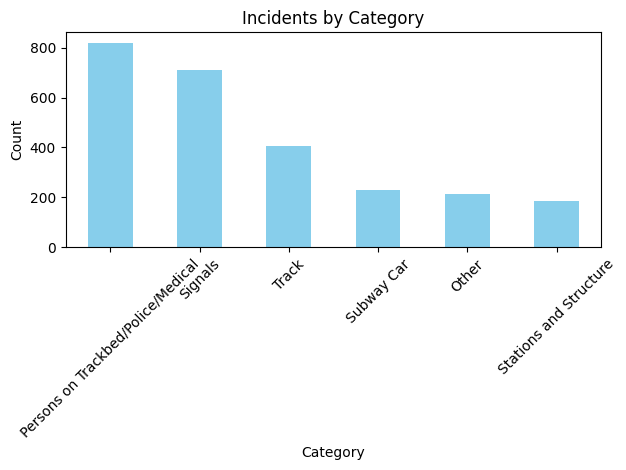

In [73]:

cat_count = df.groupby('category')['count'].sum().sort_values(ascending=False)

cat_count.plot(kind='bar', color='skyblue')
plt.title('Incidents by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Incident by Division

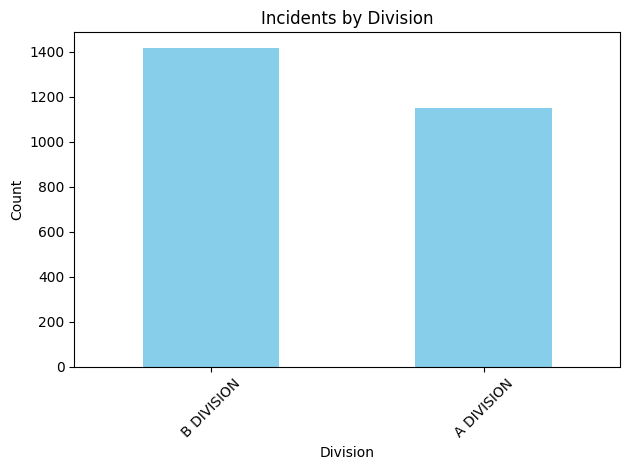

In [74]:
div = df.groupby('division')['count'].sum().sort_values(ascending=False)
#plt.figure(figsize =(10,6))
div.plot(kind='bar', color='skyblue')
plt.title('Incidents by Division')
plt.xlabel('Division')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Relationship between Weekday and Weekend

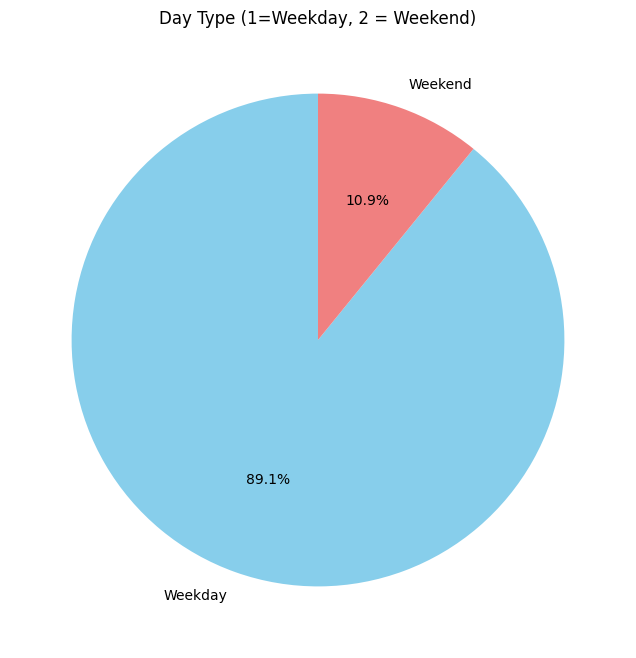

In [47]:
week = df.groupby('day_type')['count'].sum()

plt.figure(figsize=(8, 8))
plt.pie(week, labels=['Weekday', 'Weekend'],
autopct='%1.1f%%', startangle=90,
colors=['skyblue', 'lightcoral'])
plt.title('Day Type (1=Weekday, 2 = Weekend)')
plt.show()

# Incident Over time

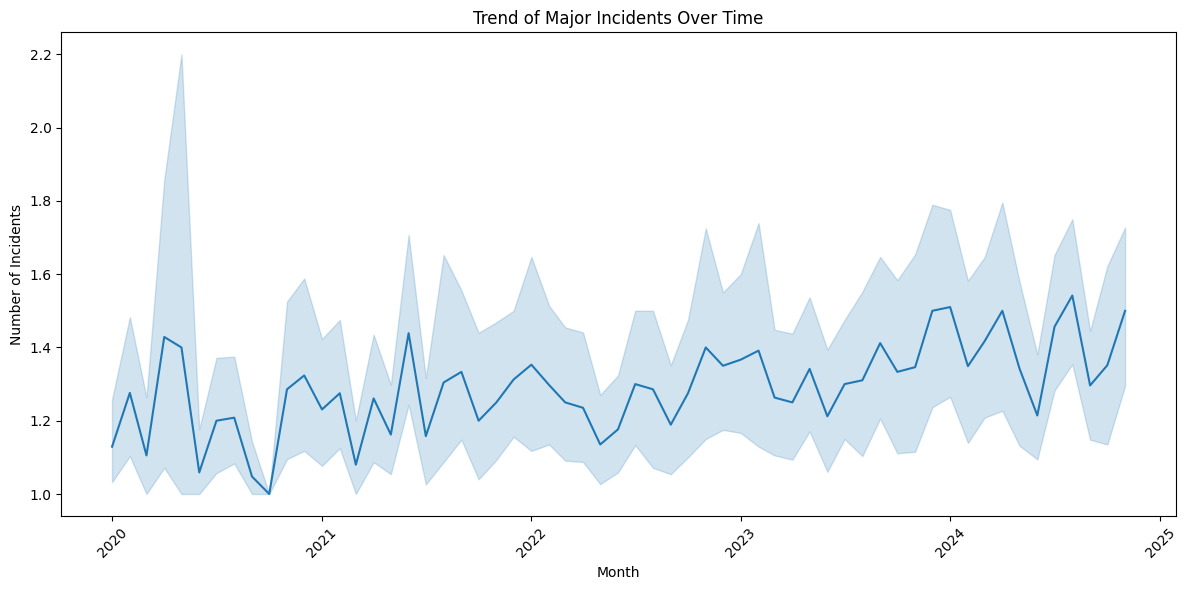

In [48]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='count', data=df)
plt.title('Trend of Major Incidents Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

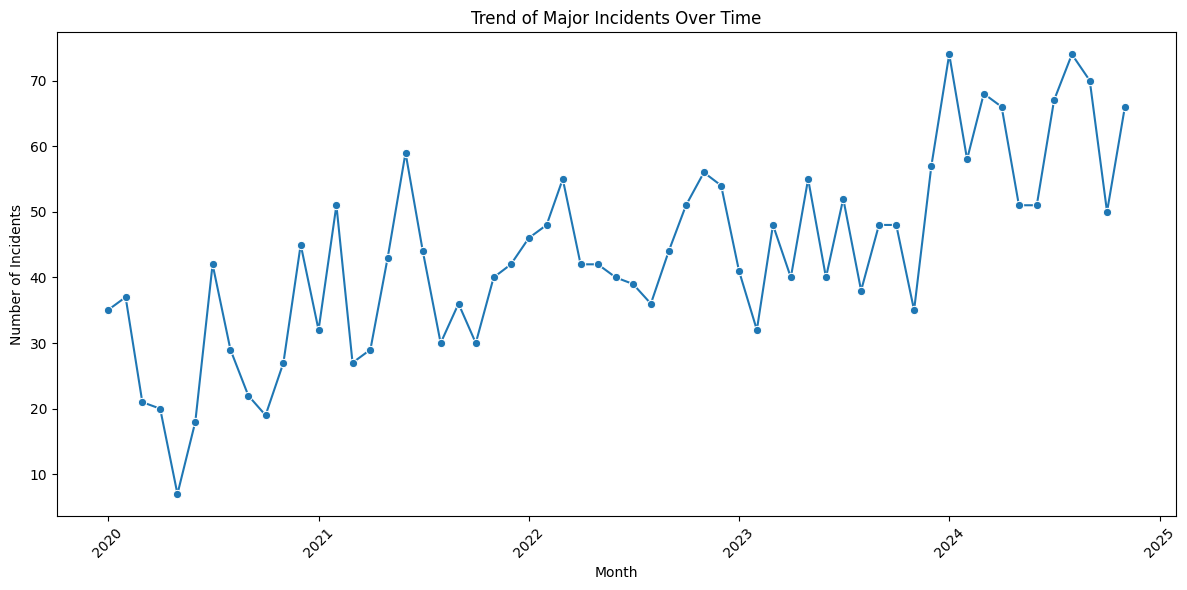

In [51]:
monthly_counts = df.groupby(df['month'].dt.to_period('M'))['count'].sum().reset_index()
monthly_counts['month'] = monthly_counts['month'].dt.to_timestamp()


plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='count', data=monthly_counts, marker='o')
plt.title('Trend of Major Incidents Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

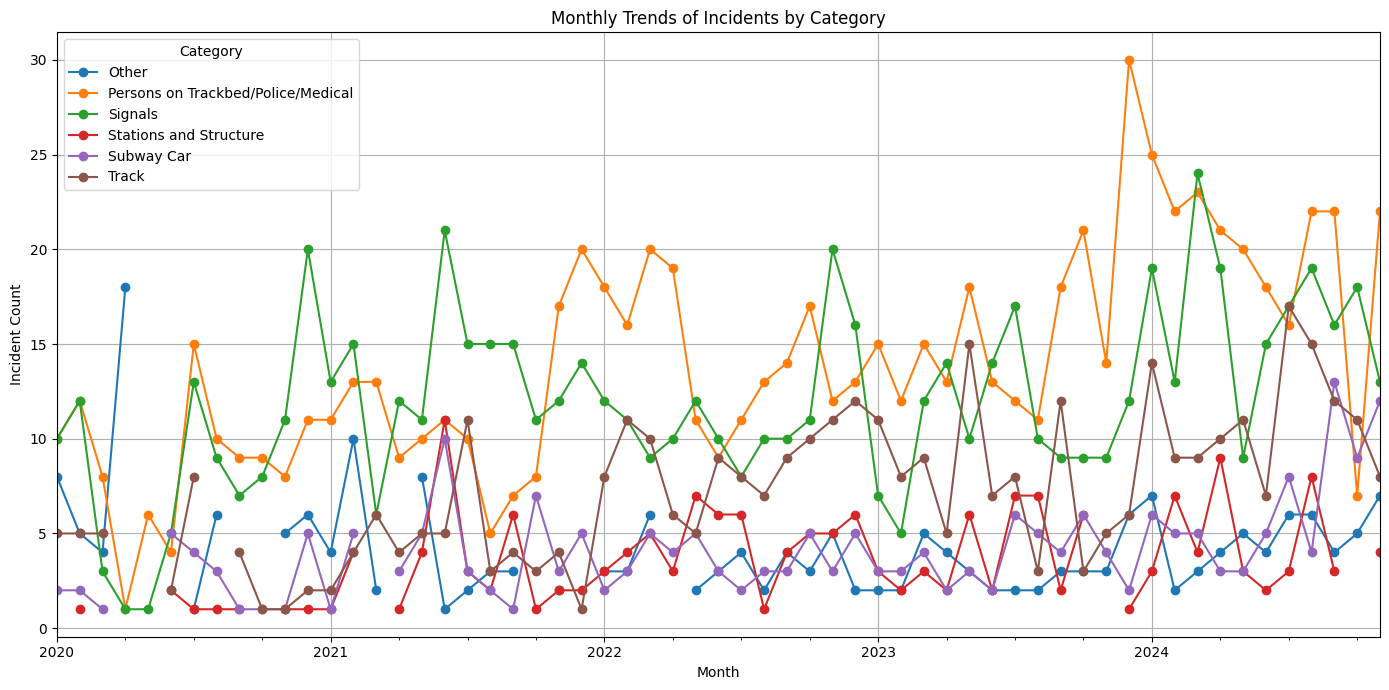

In [64]:


monthly_category_trends = df.groupby([df['month'].dt.to_period('M'), 'category'])['count'].sum().unstack()

plt.figure(figsize=(12, 6))
monthly_category_trends.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Monthly Trends of Incidents by Category')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.legend(title='Category')
plt.grid()
plt.tight_layout()
plt.show()

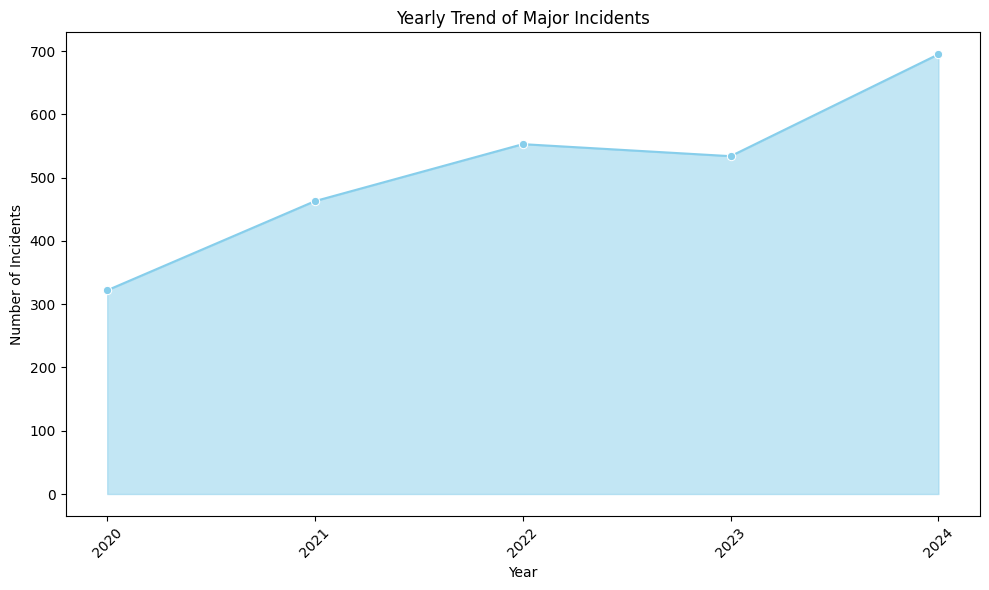

In [65]:


yearly_counts = df.groupby(df['month'].dt.year)['count'].sum().reset_index()
yearly_counts.rename(columns={'month': 'year'}, inplace=True)

# Plot the yearly trend
plt.figure(figsize=(10, 6))
plt.fill_between(yearly_counts['year'], yearly_counts['count'], color='skyblue', alpha=0.5)
sns.lineplot(x='year', y='count', data=yearly_counts, marker='o', color='skyblue')
plt.title('Yearly Trend of Major Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(yearly_counts['year'], rotation=45)
plt.tight_layout()
plt.show()


# Incident by  Weekday vs Weekend

<Figure size 1200x600 with 0 Axes>

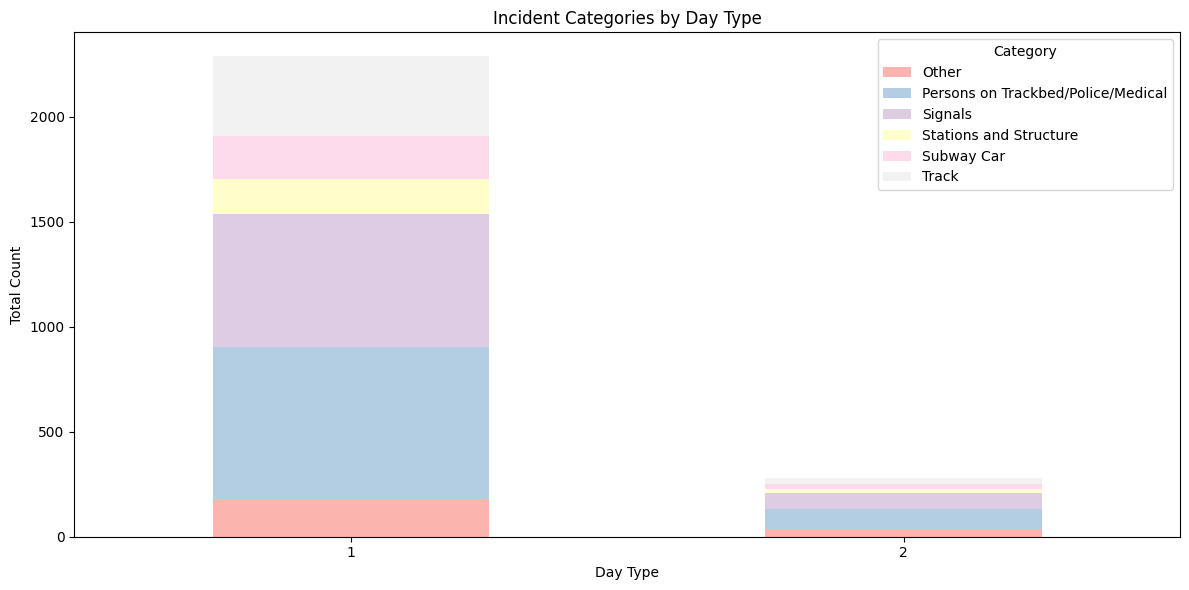

In [59]:

day_type_category = df.groupby(['day_type', 'category'])['count'].sum().unstack()

plt.figure(figsize=(12, 6))
day_type_category.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1')

plt.title('Incident Categories by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Total Count')
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Incident by Division

<Figure size 1200x600 with 0 Axes>

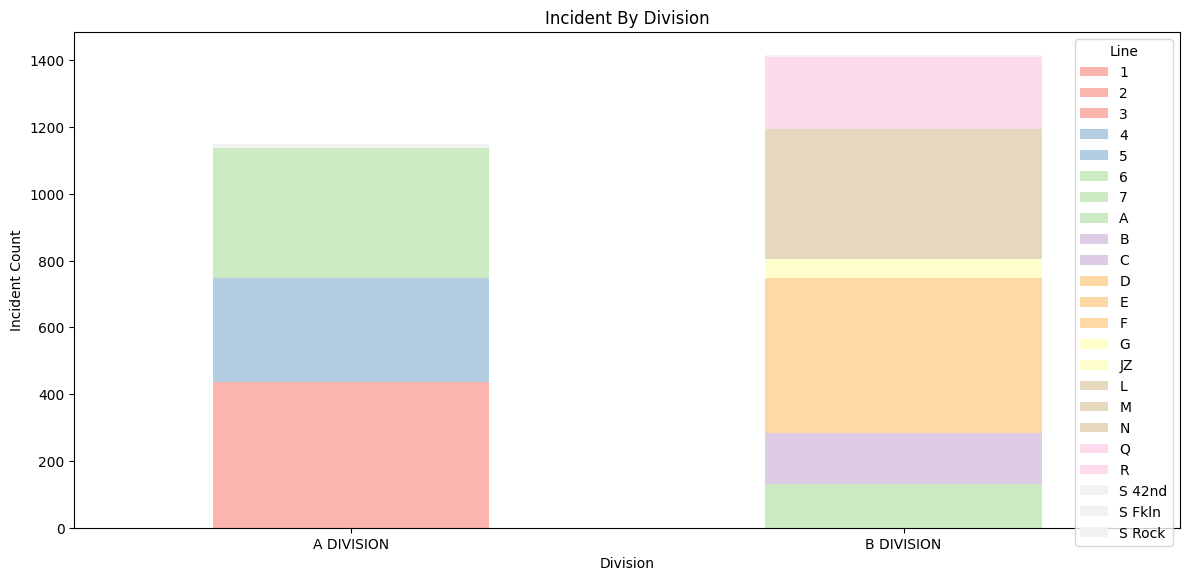

In [61]:
division_line_counts = df.groupby(['division', 'line'])['count'].sum().unstack()

division_line_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1')

plt.title('Incident By Division')
plt.xlabel('Division')
plt.ylabel('Incident Count')
plt.legend(title='Line')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Top Incident Over Time

In [66]:

seasonal_trends_all_categories = df.groupby([df['month'].dt.month, 'category'])['count'].sum().unstack()


In [67]:
 #Analyzing the top categories

top_categories = df['category'].value_counts().head(3).index  # Top 3 categories
seasonal_trends_top_categories = df[df['category'].isin(top_categories)].groupby(
    [df['month'].dt.month, 'category'])['count'].sum().unstack()

<Figure size 1400x800 with 0 Axes>

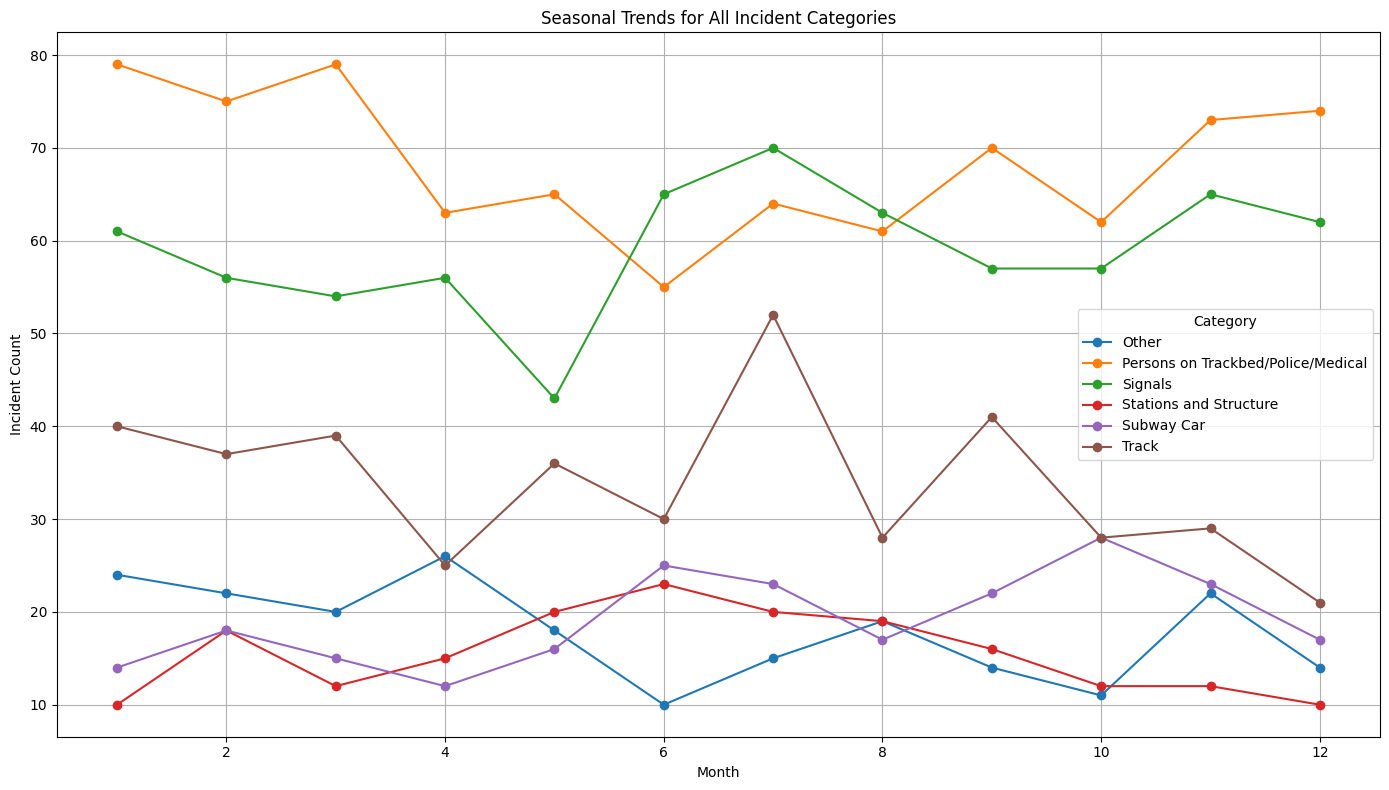

In [68]:
plt.figure(figsize=(14, 8))
seasonal_trends_all_categories.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Seasonal Trends for All Incident Categories')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.legend(title='Category')
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

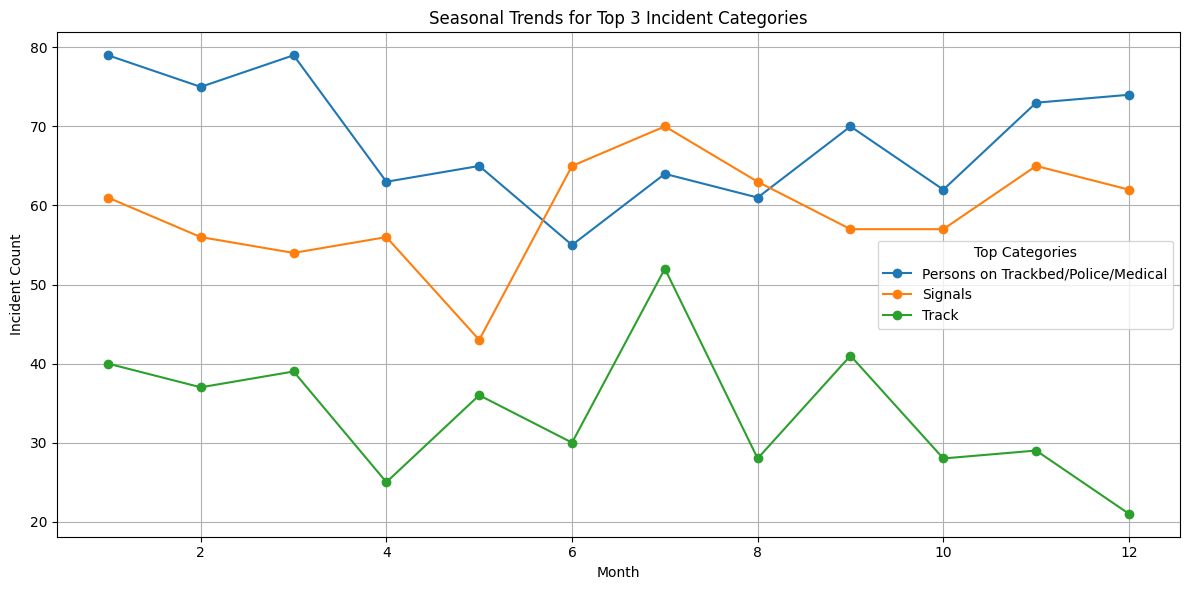

In [69]:
plt.figure(figsize=(12, 6))
seasonal_trends_top_categories.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Seasonal Trends for Top 3 Incident Categories')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.legend(title='Top Categories')
plt.grid()
plt.tight_layout()
plt.show()

In [70]:
print("Seasonal Trends for Top 3 Incident Categories:")
display(seasonal_trends_top_categories)

Seasonal Trends for Top 3 Incident Categories:


category,Persons on Trackbed/Police/Medical,Signals,Track
month,,,
1,79,61,40
2,75,56,37
3,79,54,39
4,63,56,25
5,65,43,36
6,55,65,30
7,64,70,52
8,61,63,28
9,70,57,41


# Results

Based on the analysis, the top categories of subway incidents are Persons on Trackbed/Police/Medical, Signals, and Track. Persons on Trackbed incidents consistently rank the highest across all months, emphasizing potential safety issues and operational challenges. Signal disruptions also present a significant problem, affecting service reliability and efficiency. Although track incidents occur less frequently, their impact on operations remains substantial.

Division A experiences the highest number of incidents compared to the B Division, with certain subway lines showing disproportionate disruptions. Weekday operations (Day Type 1) see higher incident counts than weekends (Day Type 2), possibly due to heavy traffic during workdays.

Seasonal trends show peaks in certain months, like January, February, and some July, for categories like Persons on Trackbed and Signals. These can be influenced by weather conditions in winter and summer, when more people living on the street flock to the subway station to escape the unpleasant seasonal conditions of heat and cool. And of course, when there is heavy snow, it affects signals and train tracks, causing lots of details.

# Recommendation

To address these challenges, MTA can implement measures to prevent Persons on Trackbed incidents, such as adding fencing, more surveillance systems, and safety protocols to reduce these incidents. Especially to high-incident divisions and lines, . Seasonal readiness and additional resources to prevent signal problems during winter seasons.

More resources are required for weekday operations for high-incident lines to create a smooth rider experience. Finally, public safety and passengers are very important. Therefore, I strongly believe having more NYPD officers in subways and trains is great for public and passenger protection and safety and potentially reduces people on the trackbed.

For those of us who ride the MTA train daily, it is daily anxiety because of so many homeless people on the trains on the subways. I have personal experience of people lying on the entire train seat sleeping, and you cannot do anything about it. Also, another big problem that is disgusting is people smoking in moving trains, and despite the no smoking sign, they still do it. Even if you wear a mask( which I always do), it’s still challenging to tolerate the smoke. I am eager to see how the number of this analysis will change by the end of 2025, which will increase commuters on the trains due to congestion pricing.


